In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')   #do not display certain warnings during execution

# All libraries loaded ok

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)



,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

# This market data shows rates of change for specific time periods across 41 different crypto currencies
# The values are normally distributed, but they need to be standardized to maximize the effectiveness of the model

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
market_data_df.columns

# display the columns in this dataframe

Index(['price_change_percentage_24h', 'price_change_percentage_7d',
       'price_change_percentage_14d', 'price_change_percentage_30d',
       'price_change_percentage_60d', 'price_change_percentage_200d',
       'price_change_percentage_1y'],
      dtype='object')

In [5]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file

scaled = StandardScaler().fit_transform(market_data_df[['price_change_percentage_24h', 'price_change_percentage_7d',\
                                                 'price_change_percentage_14d', 'price_change_percentage_30d',\
                                                 'price_change_percentage_60d', 'price_change_percentage_200d',\
                                                 'price_change_percentage_1y']])

# This creates a new set of standardized, comparable values for each field

In [6]:
# Create a DataFrame with the scaled data
df_scaled = pd.DataFrame(scaled,columns=['price_change_percentage_24h', 'price_change_percentage_7d',\
                                                 'price_change_percentage_14d', 'price_change_percentage_30d',\
                                                 'price_change_percentage_60d', 'price_change_percentage_200d',\
                                                 'price_change_percentage_1y']
)

# Copy the crypto names from the original data
df_scaled["coin_id"] = market_data_df.index

# Set the coinid column as index
df_scaled.set_index('coin_id',inplace=True)

# Display sample data
df_scaled.head()

# This new dataframe of standardized data is ready to run through the model

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


### Find the Best Value for k Using the Original Scaled DataFrame.

In [7]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11

k = list(range(1, 11))

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
# Inside the loop:
# 1. Create a KMeans model using the loop counter for the n_clusters
# 2. Fit the model to the data using the scaled DataFrame
# 3. Append the model.inertia_ to the inertia list
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=14)
    k_model.fit(df_scaled)
    inertia.append(k_model.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {"k": k, "inertia": inertia}


# Create a DataFrame with the data to plot the Elbow curve
df_elbow = pd.DataFrame(elbow_data)

# Display the DataFrame
df_elbow

# our elbow data.

,k,inertia
0,1,287.000000
1,2,212.123342
2,3,145.635748
3,4,79.022435
4,5,66.217780
5,6,53.057788
6,7,44.406791
7,8,40.888474
8,9,32.768762
9,10,28.836462


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

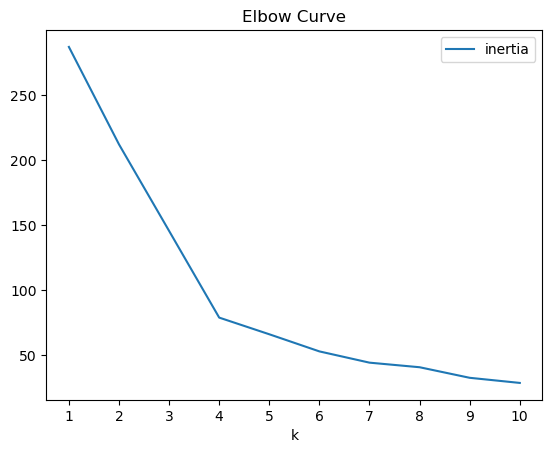

In [8]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow.plot.line(x="k",
                   y="inertia",
                   title="Elbow Curve",
                   xticks=k)

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:** clear elbow bend at k=4.  That would be the best value for k.

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [9]:
# Initialize the K-Means model using the best value for k
model = KMeans(n_clusters=4, n_init='auto', random_state=3)

# work above shows that 4 is the best value for k

In [10]:
# Fit the K-Means model using the scaled data
model.fit(df_scaled)

KMeans(n_clusters=4, random_state=3)

In [11]:
# Predict the clusters to group the cryptocurrencies using the scaled data
crypto_clusters = model.predict(df_scaled)

# View the resulting array of cluster values.
crypto_clusters

# Cluster values are mostly 0 and 1, with a very few assigned to clusters 2 and 3.  This should make for an interesting scatter plot.

array([1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 1, 0, 0, 2, 0, 0, 0, 0])

In [12]:
# Create a copy of the DataFrame
copy_df_scaled = df_scaled.copy()

copy_df_scaled.head()
# we now have a copy of the scaled data and calculated cluster

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [13]:
# Add a new column to the DataFrame with the predicted clusters
copy_df_scaled['crypto_cluster'] = crypto_clusters

# Display sample data
copy_df_scaled

# this is our data (scaled) with corresponding cluster ids

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,crypto_cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,1
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,1
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,0
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,0
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,1
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,1
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,1
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,1
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,1


<Axes: xlabel='price_change_percentage_24h', ylabel='price_change_percentage_7d'>

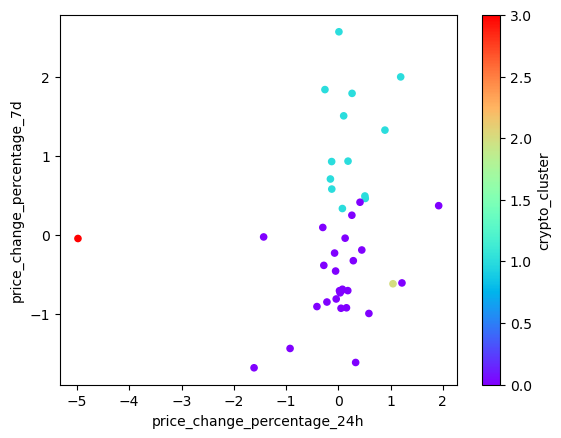

In [14]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.

copy_df_scaled.plot.scatter(
    x="price_change_percentage_24h",
    y="price_change_percentage_7d",
    c="crypto_cluster",
    colormap='rainbow')

# Celcius-degree-token has been assigned cluster 2, yet it apperas amid many other values in cluster 1.
# Only by plotting other features (such as price_change_percentage_200d) does this data point reveal why it's been put into its own cluster.

### Optimize Clusters with Principal Component Analysis.

In [15]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [16]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
ccinfo_pca = pca.fit_transform(df_scaled)

# View the first five rows of the DataFrame. 
ccinfo_pca[:5]

array([[-0.60066733,  0.84276006,  0.46159457],
       [-0.45826071,  0.45846566,  0.95287678],
       [-0.43306981, -0.16812638, -0.64175193],
       [-0.47183495, -0.22266008, -0.47905316],
       [-1.15779997,  2.04120919,  1.85971527]])

In [17]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
display(pca.explained_variance_ratio_)
print(f'Total explained variance is {sum(pca.explained_variance_ratio_):.5f}.')

array([0.3719856 , 0.34700813, 0.17603793])

Total explained variance is 0.89503.


#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** The total explained variance is the sum of the explained variance for each of the principal components.  That is 89.5%.

In [18]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
ccinfo_pca_df = pd.DataFrame(
    ccinfo_pca,
    columns=["PCA1", "PCA2", "PCA3"]
)

# Copy the crypto names from the original data
ccinfo_pca_df ['coin-id'] = df_scaled.index

# Set the coinid column as index
ccinfo_pca_df.set_index('coin-id',inplace=True)

# Display sample data
ccinfo_pca_df.head()

,PCA1,PCA2,PCA3
coin-id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [19]:
# Create a a list to store inertia values and the values of k

# to avoid confusion, use different variable names from above
inertia1 = []
k1 = list(range(1, 11))

# Append the value of the computed inertia from the `inertia_` attribute of teh KMeans model instance
for i in k1:
    k_model1 = KMeans(n_clusters=i, n_init='auto', random_state=1)
    k_model1.fit(ccinfo_pca_df)
    inertia1.append(k_model1.inertia_)

# Define a DataFrame to hold the values for k and the corresponding inertia
elbow_data1 = {"k": k1, "inertia": inertia1}
df_elbow1 = pd.DataFrame(elbow_data1)

# Review the DataFrame
df_elbow1.head()

#All of the variables are different from those used in the earlier k value analysis to avoid confusion

,k,inertia
0,1,256.874086
1,2,182.339530
2,3,135.442408
3,4,49.665497
4,5,38.672582


<Axes: title={'center': 'Elbow Curve PCA data'}, xlabel='k'>

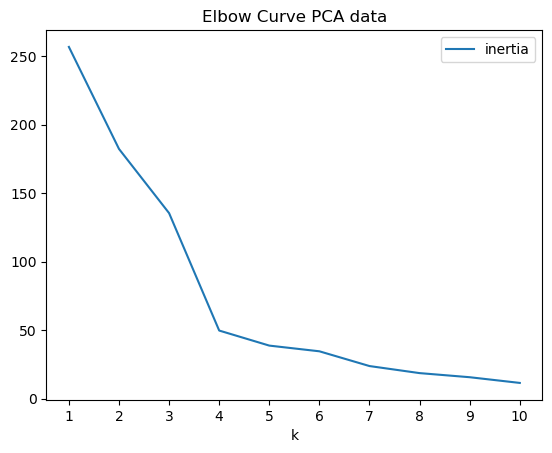

In [20]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
df_elbow1.plot.line(
    x="k", 
    y="inertia", 
    title="Elbow Curve PCA data", 
    xticks=k
)

# this looks very much like the elbow curve based on the original data.

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** Elbow bend is still at k=4


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** Happily the optimal k value is same as found with the original data.  This is good because the PCA method is meant to provide essentially the same characteristics as the original data, only with less complexity, and hopefully requiring less compute power.

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [21]:
# Initialize the K-Means model using the best value for k
# Define the model with 3 clusters

# Again using slightly different variable names to avoid confusion
model1 = KMeans(n_clusters=4, n_init='auto', random_state=0)

In [22]:
# Fit the K-Means model using the PCA data
# Fit the model
model1.fit(ccinfo_pca_df)

KMeans(n_clusters=4, random_state=0)

In [23]:
# Predict the clusters to group the cryptocurrencies using the PCA data
# Make predictions
k_4 = model1.predict(ccinfo_pca_df)

# Print the resulting array of cluster values.
k_4

array([2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 3, 0, 0, 0, 0])

In [24]:
# Create a copy of the DataFrame with the PCA data
ccinfo_pca_predictions_df = ccinfo_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
ccinfo_pca_predictions_df["customer_segments"] = k_4

# Display sample data
ccinfo_pca_predictions_df.head()

,PCA1,PCA2,PCA3,customer_segments
coin-id,,,,
bitcoin,-0.600667,0.842760,0.461595,2
ethereum,-0.458261,0.458466,0.952877,2
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,2


<Axes: xlabel='PCA1', ylabel='PCA2'>

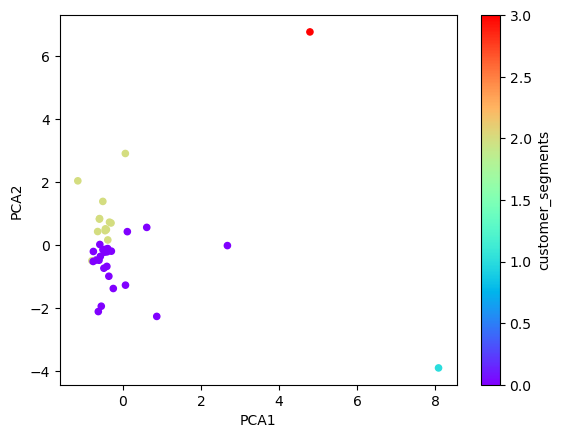

In [25]:
# Create a scatter plot using hvPlot by setting `x="PCA1"` and `y="PCA2"`. 
ccinfo_pca_predictions_df.plot.scatter(
    x="PCA1",
    y="PCA2",
    c="customer_segments",
    colormap='rainbow')

**Question:** What is the impact of using fewer features to cluster the data using K-Means?

**Answer:** Using fewer features can help by reducing noise in the data and making the data clusters clearer.  It can make interpretation of the data easier.  
On the other hand, using fewer features might throw out some data that is actually important to interpretation of the results.  Also, the PCA features are no longer tied directly to original features, which could make interpretation more difficult too.


### Determine the Weights of Each Feature on each Principal Component

In [26]:
# Use the columns from the original scaled DataFrame as the index.
pca_component_weights = pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2', 'PCA3'], index=df_scaled.columns)
pca_component_weights

# weights of each feature - degree to which each feature affects each component - are listed in this dataframe

,PCA1,PCA2,PCA3
price_change_percentage_24h,-0.416728,0.358162,-0.218795
price_change_percentage_7d,-0.102432,0.227432,0.787670
price_change_percentage_14d,-0.009162,0.540415,0.349534
price_change_percentage_30d,0.191523,0.562182,-0.181744
price_change_percentage_60d,0.320365,0.434040,-0.361377
price_change_percentage_200d,0.594468,0.027735,0.039733
price_change_percentage_1y,0.568379,-0.150789,0.210541


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** The component weights under each principal component indicate the influence from each feature (row labels).  
So for PCA1 the feature with the strongest positive influence is price_change_percentage_200d because 0.594468 is the highest value in the PCA1 column.  
For PCA1 the feature with the strongest _negative_ influence is price_change_percentage_24h because -0.416728 is the lowest value in that column.

This table shows the of strongest positive and negative features for each component.

|  Feature with | PCA1 | PCA2 | PCA3 |
| --- | ---- | ---- | ---- |
|Strongest Positive influence | price_change_percentage_200d | price_change_percentage_30d | price_change_percentage_7d |
|Strongest Negative influence | price_change_percentage_24h | price_change_percentage_1y | price_change_percentage_60d |
    